<a href="https://colab.research.google.com/github/PedroLucasMendes/ClustLoRa/blob/main/AnaliseLoRaMiniSom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install minisom

In [ ]:
#Basic imports
import numpy as np
import pandas as pd

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
import matplotlib.pyplot as plt
from minisom import MiniSom

In [ ]:
def convertendoLogParaDataFrame(arq,dist, quant):
  vetor_dicio = []

  with open(arq,'r') as data:
      linhas = data.readlines()
      for linha in linhas:
        nova_linha = linha.split(";")
        if(nova_linha[1] != "SEMPACTRC\n"):
          dicio_info = {}
          dicio_info["Hora"] = nova_linha[0]
          dicio_info["SF"] = nova_linha[1]
          dicio_info["BW"] = nova_linha[2]
          dicio_info["PT"] = nova_linha[3]
          dicio_info["RSSI"] = nova_linha[4]
          dicio_info["SNR"] = nova_linha[5].replace("\n","")
          dicio_info["Dist"] = dist
          vetor_dicio.append(dicio_info)
  df = pd.DataFrame.from_dict(vetor_dicio)

  alcir = []
  soma = 0
  PDR = 0
  SF =["7","8","9","10","11","12"]
  BW = ["125.00","250.00","500.00"]
  PT = ["10","12","14","16","18","20"]

  for i in SF:
    for j in BW:
        for k in PT:
            soma = 0
            media = 0
            NewDf = df.loc[(df['SF'] == i) & (df['BW'] == j) & (df['PT'] == k)]
            if(len(NewDf)==0):
                new_row = {'Hora': None, 'RSSI': -1, 'SNR': -1,'SF': i, 'BW': j, 'PT': k, 'PDR': 0, "Dist": -1, "R": 0}
                df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
                NewDf = df.loc[(df['SF'] == i) & (df['BW'] == j) & (df['PT'] == k)]
                #print("Tratou a parada!!!   ", len(NewDf))
                PDR = len(NewDf)
                df.loc[(df['SF'] == i) & (df['BW'] == j) & (df['PT'] == k), 'PDR'] = (PDR/quant)*100
                alcir.append(0)
                #print(i, j, k)
            else:
                #print("Não tratou a parada!!!   ", len(NewDf))
                PDR = len(NewDf)
                df.loc[(df['SF'] == i) & (df['BW'] == j) & (df['PT'] == k), 'PDR'] = (PDR/quant)*100

                RSSIva = sum(pd.to_numeric(df.loc[(df['SF'] == i) & (df['BW'] == j) & (df['PT'] == k), 'RSSI']))
                RSSImi = pd.to_numeric(df['RSSI']).min()
                RSSImax = pd.to_numeric(df['RSSI']).max()



                print("RSSImi: ", RSSImi)
                print("RSSImax: ", RSSImax)


                print(sum(pd.to_numeric(df.loc[(df['SF'] == i) & (df['BW'] == j) & (df['PT'] == k), 'SNR']))/PDR)
                SNRva = sum(pd.to_numeric(df.loc[(df['SF'] == i) & (df['BW'] == j) & (df['PT'] == k), 'SNR'])+20)
                SNRmi = pd.to_numeric(df['SNR']).min()+20
                SNRmax = pd.to_numeric(df['SNR']).max()+20


                print("SNRmi: ", SNRmi)
                print("SNRmax: ", SNRmax)


                RSSIva = RSSIva/ PDR
                SNRva = SNRva/PDR



                    #print(PDR)
                print("RSSIva: ", RSSIva)
                print("SNRva: ", SNRva)
                PDR = PDR/120

                print("PDR porc: ",PDR)

                RSSInorm = (RSSIva - RSSImi)/ (RSSImax - RSSImi)
                SNRnorm = (SNRva - SNRmi)/ (SNRmax - SNRmi)
                print("RSSInorm: ", RSSInorm)
                print("SNRnorm: ", SNRnorm)

                valorR = 0.2*((-1)*RSSInorm)+0.2*SNRnorm+0.6*PDR

                print("valor do R ", valorR)
                #print(i, j, k)
                df.loc[(df['SF'] == i) & (df['BW'] == j) & (df['PT'] == k), 'R'] = valorR
                alcir.append(valorR)
  return df

In [ ]:
df1 = convertendoLogParaDataFrame("experimento1.log",70, 20)
df2 = convertendoLogParaDataFrame("experimento2.txt",140, 100)
df = pd.concat([df1, df2])
df.info()

RSSImi:  -135.75
RSSImax:  -108.0
6.3875
SNRmi:  2.25
SNRmax:  32.0
RSSIva:  -114.5
SNRva:  26.3875
PDR porc:  0.16666666666666666
RSSInorm:  0.7657657657657657
SNRnorm:  0.811344537815126
valor do R  0.10911575440987208
RSSImi:  -135.75
RSSImax:  -108.0
7.0375
SNRmi:  2.25
SNRmax:  32.0
RSSIva:  -113.75
SNRva:  27.0375
PDR porc:  0.16666666666666666
RSSInorm:  0.7927927927927928
SNRnorm:  0.8331932773109244
valor do R  0.10808009690362631
RSSImi:  -135.75
RSSImax:  -108.0
6.6375
SNRmi:  2.25
SNRmax:  32.0
RSSIva:  -114.6
SNRva:  26.6375
PDR porc:  0.16666666666666666
RSSInorm:  0.7621621621621624
SNRnorm:  0.8197478991596638
valor do R  0.11151714739950029
RSSImi:  -135.75
RSSImax:  -108.0
7.5125
SNRmi:  2.25
SNRmax:  32.0
RSSIva:  -112.75
SNRva:  27.5125
PDR porc:  0.16666666666666666
RSSInorm:  0.8288288288288288
SNRnorm:  0.8491596638655462
valor do R  0.10406616700734349
RSSImi:  -135.75
RSSImax:  -108.0
7.6375
SNRmi:  2.25
SNRmax:  32.0
RSSIva:  -112.8
SNRva:  27.6375
PDR porc:  

In [ ]:
df['SF'] = pd.to_numeric(df['SF'], errors='coerce')
df['BW'] = pd.to_numeric(df['BW'], errors='coerce')
df['PT'] = pd.to_numeric(df['PT'], errors='coerce')
df['RSSI'] = pd.to_numeric(df['RSSI'], errors='coerce')
df['SNR'] = pd.to_numeric(df['SNR'], errors='coerce')

In [ ]:
df.isnull().sum()

Hora    16
SF       0
BW       0
PT       0
RSSI     0
SNR      0
Dist     0
PDR      0
R        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10207 entries, 0 to 8056
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hora    10191 non-null  object 
 1   SF      10207 non-null  int64  
 2   BW      10207 non-null  float64
 3   PT      10207 non-null  int64  
 4   RSSI    10207 non-null  float64
 5   SNR     10207 non-null  float64
 6   Dist    10207 non-null  int64  
 7   PDR     10207 non-null  float64
 8   R       10207 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 797.4+ KB


array([[<Axes: title={'center': 'SF'}>, <Axes: title={'center': 'BW'}>,
        <Axes: title={'center': 'PT'}>],
       [<Axes: title={'center': 'RSSI'}>,
        <Axes: title={'center': 'SNR'}>,
        <Axes: title={'center': 'Dist'}>],
       [<Axes: title={'center': 'PDR'}>, <Axes: title={'center': 'R'}>,
        <Axes: >]], dtype=object)

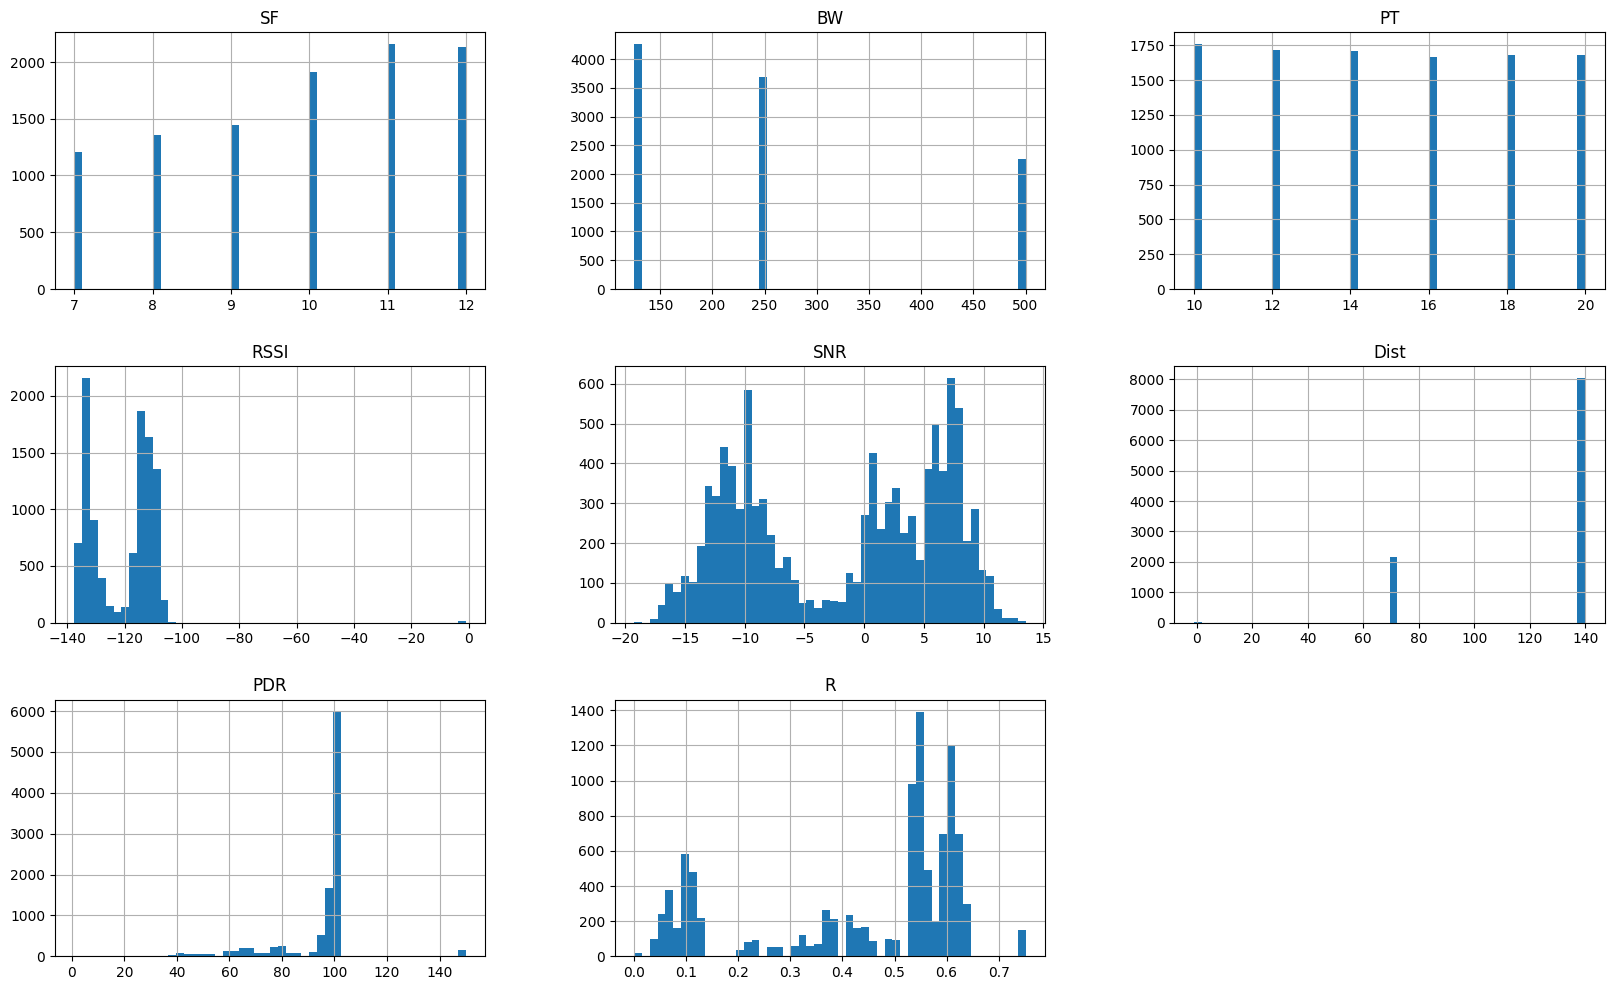

In [ ]:
df.hist(bins=50, figsize=(20,12))

<Axes: xlabel='SF', ylabel='SNR'>

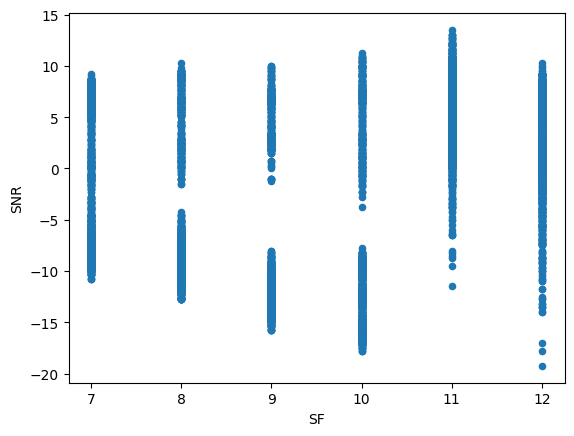

In [ ]:
df.plot(kind="scatter", x="SF", y="SNR")

<Axes: xlabel='SNR', ylabel='RSSI'>

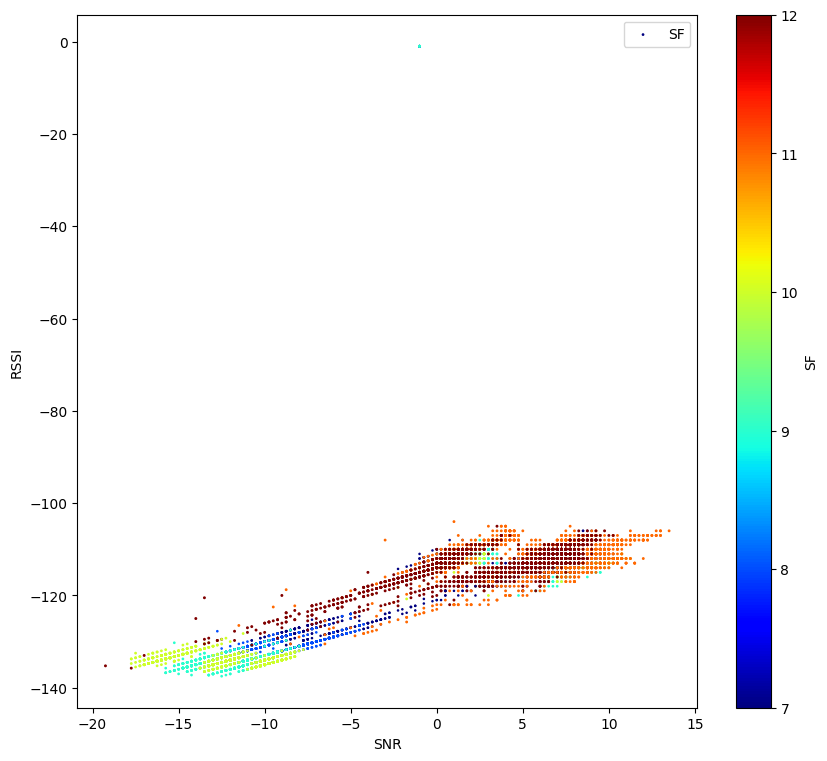

In [ ]:
df.plot(kind="scatter", x="SNR", y="RSSI", alpha=1, s=df["SF"]/10, label='SF', c="SF" ,figsize=(10,9), cmap=plt.get_cmap("jet"), colorbar=True)

In [ ]:
df['SF_BW_PT'] = df['SF'].astype(str) + '_' + df['BW'].astype(str) + '_' + df['PT'].astype(str)
df['SF_BW_PT']

0       7_125.0_10
1       7_125.0_10
2       7_125.0_10
3       7_125.0_10
4       7_125.0_10
           ...    
8052    9_500.0_10
8053    9_500.0_12
8054    9_500.0_16
8055    9_500.0_18
8056    9_500.0_20
Name: SF_BW_PT, Length: 10207, dtype: object

In [ ]:
X = df.copy()
X = X.drop(["Hora","SF_BW_PT","BW","R","PT","SF"], axis=1)
X.head()

,RSSI,SNR,Dist,PDR
0,-114.0,6.50,70,100.0
1,-115.0,6.00,70,100.0
2,-115.0,6.75,70,100.0
3,-115.0,6.25,70,100.0
4,-115.0,6.75,70,100.0


In [ ]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [ ]:
#Find which cluster each data-point belongs to
clusters = kmeans.predict(X)

In [ ]:
#Add the cluster vector to our DataFrame, X
X["Cluster"] = clusters

In [ ]:
#plotX is a DataFrame containing 5000 values sampled randomly from X
plotX = pd.DataFrame(np.array(X.sample(5000)))

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = X.columns

In [ ]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [ ]:
#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [ ]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [ ]:
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

In [ ]:
plotX["dummy"] = 0


In [ ]:
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]

In [ ]:
#This is needed so we can display plotly plots properly
#init_notebook_mode(connected=True)

In [ ]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [ ]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [ ]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["PC1_3d"],
                    y = cluster2["PC2_3d"],
                    z = cluster2["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [ ]:
#plotX will hold the values we wish to plot
plotX = pd.DataFrame(np.array(X.sample(5000)))
plotX.columns = X.columns

In [ ]:
#Set our perplexity
perplexity = 50

In [ ]:
#T-SNE with one dimension
#tsne_1d = TSNE(n_components=1, perplexity=perplexity)

#T-SNE with two dimensions
tsne_2d = TSNE(n_components=2, perplexity=perplexity)

#T-SNE with three dimensions
#tsne_3d = TSNE(n_components=3, perplexity=perplexity)

In [ ]:
#This DataFrame holds a single dimension,built by T-SNE
#TCs_1d = pd.DataFrame(tsne_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains two dimensions, built by T-SNE
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three dimensions, built by T-SNE
#TCs_3d = pd.DataFrame(tsne_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [ ]:
#TCs_1d.columns = ["TC1_1d"]

PCs_1d.columns = ["PC1_1d"]

#"TC1_2d" means: 'The first component of the components created for 2-D visualization, by T-SNE.'
#And "TC2_2d" means: 'The second component of the components created for 2-D visualization, by T-SNE.'
TCs_2d.columns = ["TC1_2d","TC2_2d"]

#TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]

In [ ]:
plotX = pd.concat([plotX,TCs_2d], axis=1, join='inner')

In [ ]:
plotX["dummy"] = 0

In [ ]:
cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]

In [ ]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_2d"],
                    y = cluster2["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [ ]:
X.head()

,RSSI,SNR,Dist,PDR,Cluster
0,-114.0,6.50,70,100.0,1
1,-115.0,6.00,70,100.0,1
2,-115.0,6.75,70,100.0,1
3,-115.0,6.25,70,100.0,1
4,-115.0,6.75,70,100.0,1


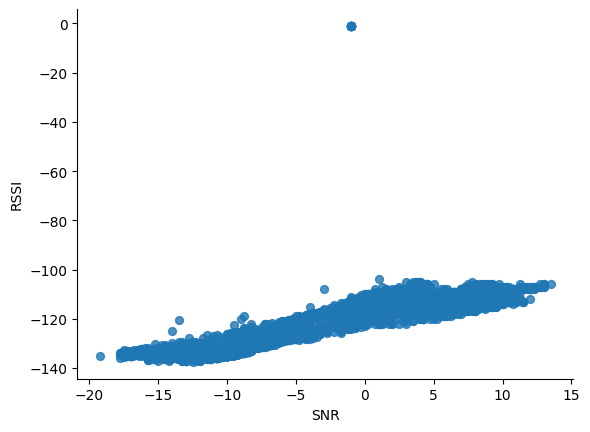

In [ ]:
# @title PT vs RSSI

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='SNR', y='RSSI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

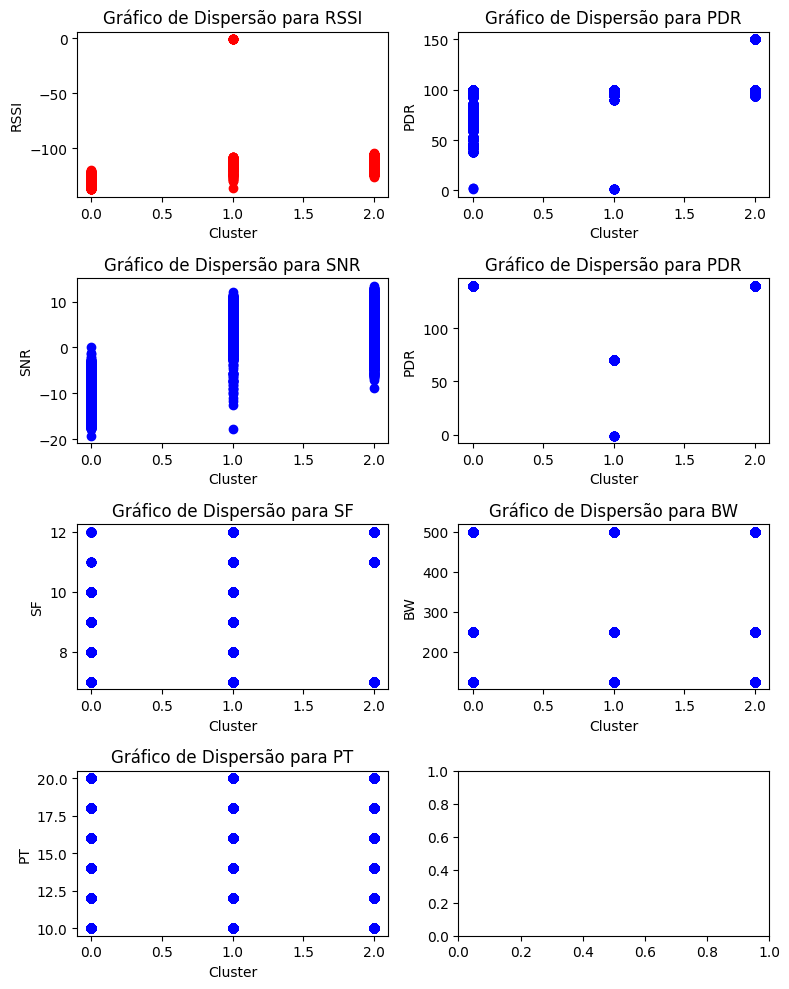

In [ ]:
import matplotlib.pyplot as plt

df["Cluster"] = X["Cluster"]

# Criar subplots
fig, axs = plt.subplots(4, 2, figsize=(8, 10))

# Plotar o primeiro gráfico de dispersão para o atributo 1
axs[0][0].scatter(df["Cluster"], df["RSSI"], color='red')
axs[0][0].set_xlabel('Cluster')
axs[0][0].set_ylabel('RSSI')
axs[0][0].set_title('Gráfico de Dispersão para RSSI')

# Plotar o segundo gráfico de dispersão para o atributo 2
axs[1][0].scatter(df["Cluster"], df["SNR"], color='blue')
axs[1][0].set_xlabel('Cluster')
axs[1][0].set_ylabel('SNR')
axs[1][0].set_title('Gráfico de Dispersão para SNR')

# Plotar o segundo gráfico de dispersão para o atributo 2
axs[0][1].scatter(df["Cluster"], df["PDR"], color='blue')
axs[0][1].set_xlabel('Cluster')
axs[0][1].set_ylabel('PDR')
axs[0][1].set_title('Gráfico de Dispersão para PDR')

# Plotar o segundo gráfico de dispersão para o atributo 2
axs[1][1].scatter(df["Cluster"], df["Dist"], color='blue')
axs[1][1].set_xlabel('Cluster')
axs[1][1].set_ylabel('PDR')
axs[1][1].set_title('Gráfico de Dispersão para PDR')

# Plotar o segundo gráfico de dispersão para o atributo 2
axs[2][0].scatter(df["Cluster"], df["SF"], color='blue')
axs[2][0].set_xlabel('Cluster')
axs[2][0].set_ylabel('SF')
axs[2][0].set_title('Gráfico de Dispersão para SF')

# Plotar o segundo gráfico de dispersão para o atributo 2
axs[3][0].scatter(df["Cluster"], df["PT"], color='blue')
axs[3][0].set_xlabel('Cluster')
axs[3][0].set_ylabel('PT')
axs[3][0].set_title('Gráfico de Dispersão para PT')

# Plotar o segundo gráfico de dispersão para o atributo 2
axs[2][1].scatter(df["Cluster"], df["BW"], color='blue')
axs[2][1].set_xlabel('Cluster')
axs[2][1].set_ylabel('BW')
axs[2][1].set_title('Gráfico de Dispersão para BW')

# Ajustar o layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()

array([[<Axes: title={'center': 'RSSI'}>,
        <Axes: title={'center': 'SNR'}>],
       [<Axes: title={'center': 'Dist'}>,
        <Axes: title={'center': 'PDR'}>],
       [<Axes: title={'center': 'Cluster'}>, <Axes: >]], dtype=object)

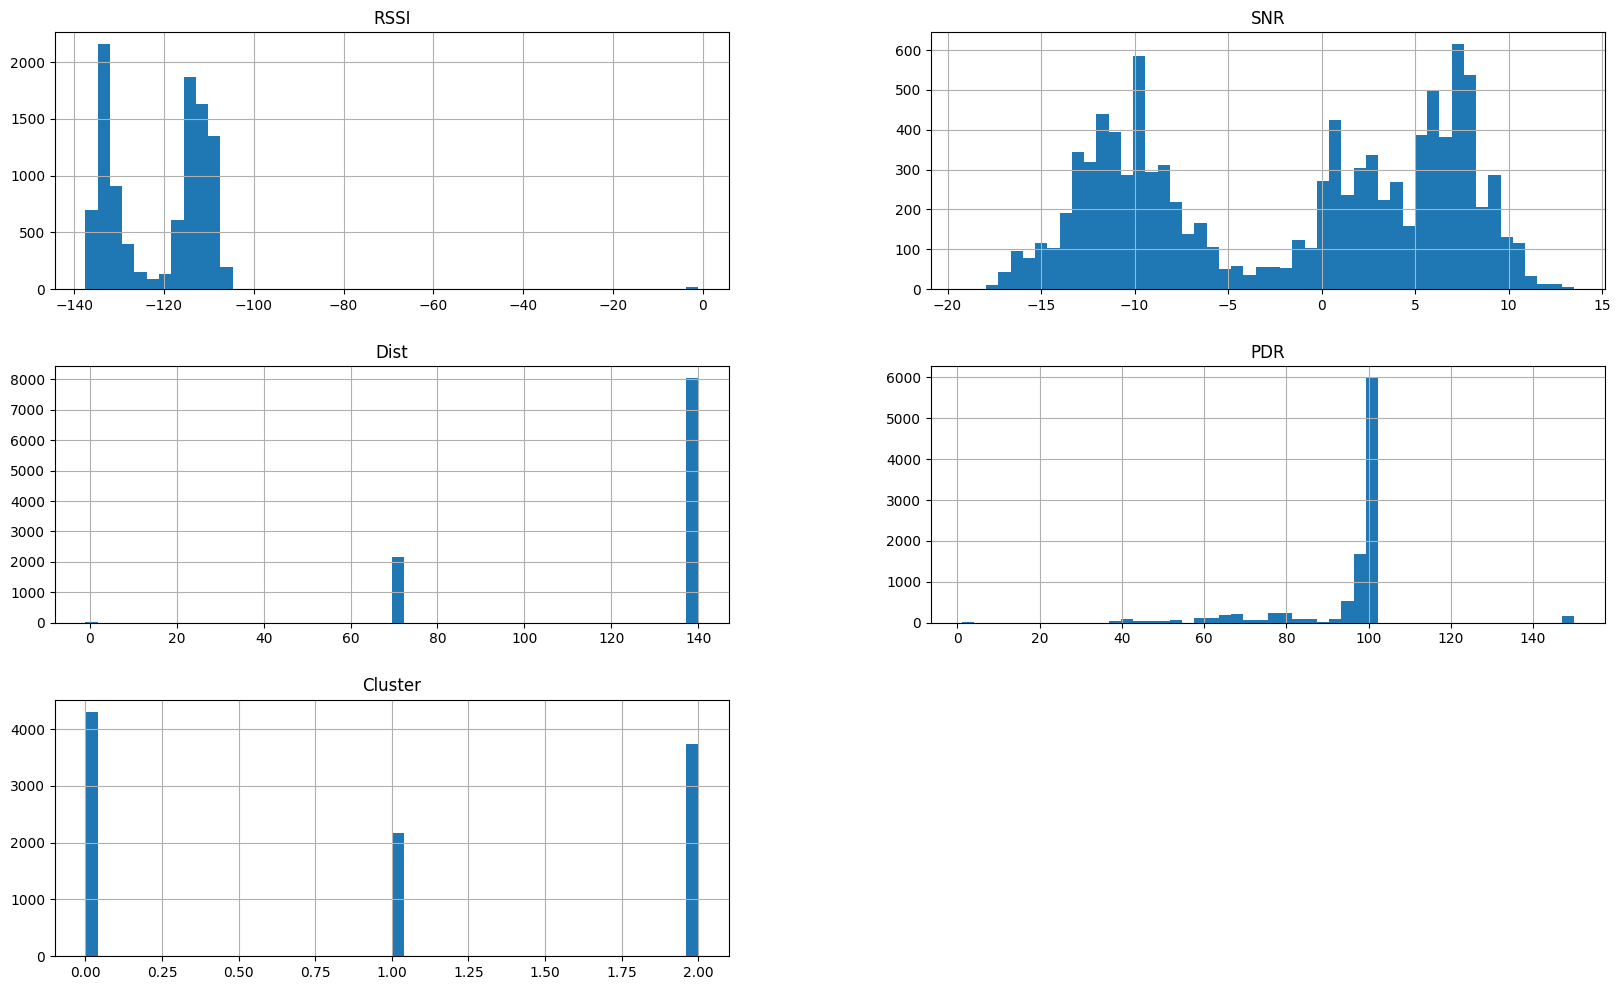

In [ ]:
X.hist(bins=50, figsize=(20,12))

In [ ]:
valores0 = df.loc[(df["Cluster"] == 0)]
valores0.head()

,Hora,SF,BW,PT,RSSI,SNR,Dist,PDR,R,SF_BW_PT,Cluster
217,15:03:34,7,125.0,12,-130.00,-7.00,140,97.0,0.496038,7_125.0_12,0
247,15:05:15,7,125.0,14,-123.25,-1.25,140,78.0,0.417764,7_125.0_14,0
248,15:05:18,7,125.0,14,-125.50,-4.50,140,78.0,0.417764,7_125.0_14,0
249,15:05:21,7,125.0,14,-130.50,-8.50,140,78.0,0.417764,7_125.0_14,0
250,15:05:24,7,125.0,14,-125.25,-3.25,140,78.0,0.417764,7_125.0_14,0


<Figure size 1800x1500 with 0 Axes>

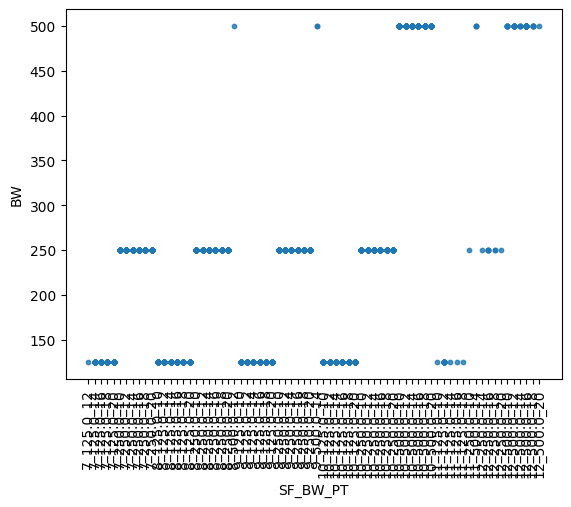

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 10), dpi=150)
valores0.plot(kind='scatter', x='SF_BW_PT', y='BW', s=10, alpha=.8)
plt.xticks( rotation=90)
plt.show()